In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from xgboost import XGBClassifier
import dalex as dx
from yellowbrick.classifier import DiscriminationThreshold
from imblearn.over_sampling import SMOTE

from unified_functions import get_model_pipeline, train_and_evaluate_model, tune_hyperparameters, plot_roc, plot_confusion_matrix, plot_discrimination_threshold, plot_feature_importances

/home/piotr/Studia/5_Semestr/studia_env/lib/python3.12/site-packages/dalex/_global_checks.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [4]:
df = pd.read_csv("../materials/processed_df_new.csv")
df.head()

,ID,wiek,PSA,PSAdensity,MRI vol,MRI Pirads,MRI EPE,MRI EPE L,MRI EPE P,MRI SVI,MRI SVI L,MRI SVI P,MRI SIZE,Bx ISUP Grade P,Bx ISUP Grade L,ISUP RP,ISUP RP P,ISUP RP L,SM +,N +,EPE RP,EPE L RP,EPE P RP,SVI RP,SVI RP L,SVI RP P,TNM,EPE micro,EPE macro,EPE false_positive,Bx ISUP Grade
0,ID00000,63.0,5.11,0.146000,35.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2,0.0,0.0,1.0,1.0
1,ID00008,64.0,5.39,0.179667,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,t3a,1.0,0.0,0.0,3.0
2,ID00500,64.0,8.30,0.207500,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
3,ID00001,56.0,6.80,0.200000,34.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,2,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,2.0
4,ID00002,59.0,40.00,2.222222,18.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,18.0,1,2.0,5.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,t3a,0.0,1.0,0.0,2.0


In [5]:
target_col = "SVI RP"

In [6]:
numerical_cols = ['wiek', 'PSA', 'PSAdensity', 'MRI vol', 'MRI SIZE']
categorical_cols = ['MRI EPE', 'MRI Pirads', 'MRI EPE L', 'MRI EPE P', 'MRI SVI', 'MRI SVI L', 'MRI SVI P','Bx ISUP Grade P', 'Bx ISUP Grade L', 'Bx ISUP Grade']

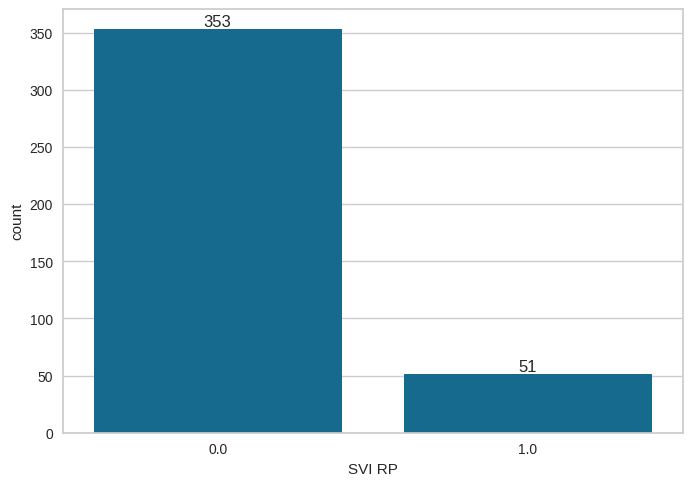

In [7]:
ax = sns.countplot(x=target_col, data=df)
ax.bar_label(ax.containers[0])
plt.show()

Tuning hyperparameters...



/home/piotr/anaconda3/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/home/piotr/anaconda3/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/home/piotr/anaconda3/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81

Best hyperparameters: {'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 6, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best neg_brier_score score: -0.0836953538693938

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parall

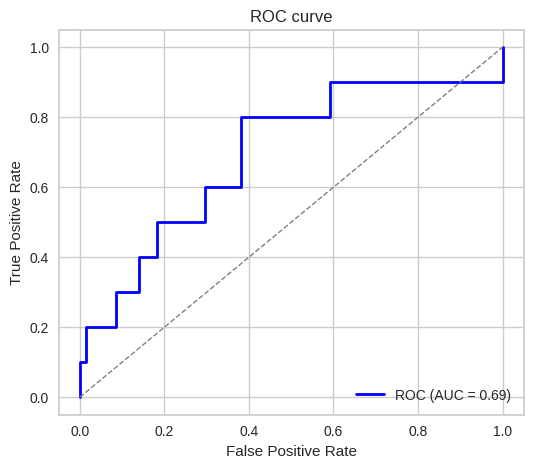

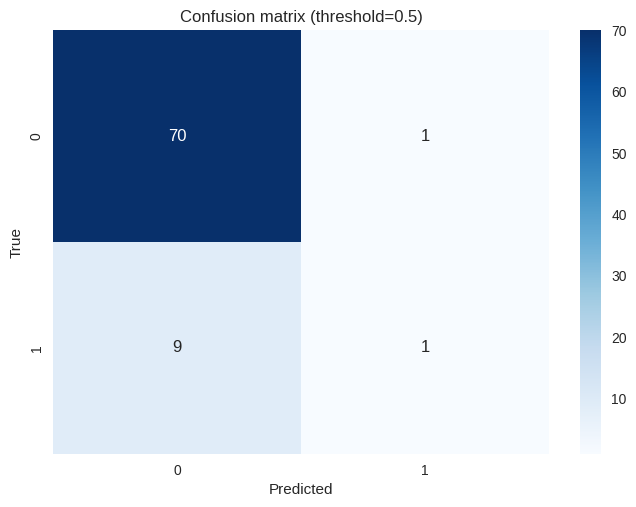

Preparation of a new explainer is initiated

  -> data              : 404 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x76d33df514e0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0012, mean = 0.116, max = 0.982
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.618, mean = 0.0105, max = 0.997
  -> model_info        : package sklearn

A new explainer has been created!


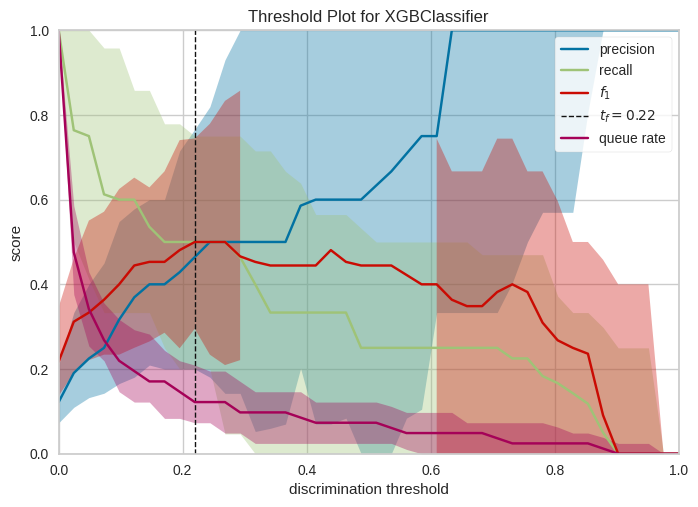

In [29]:
X = df[numerical_cols + categorical_cols]
y = df[target_col]

param_grid = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [200, 400, 800],
    'classifier__max_depth': [3, 6, 9],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

model = XGBClassifier(random_state=2)
#brier score and tuning test split = 0.2
y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.2)
untrained_model = model.set_params(**best_params)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(untrained_model, X, y)

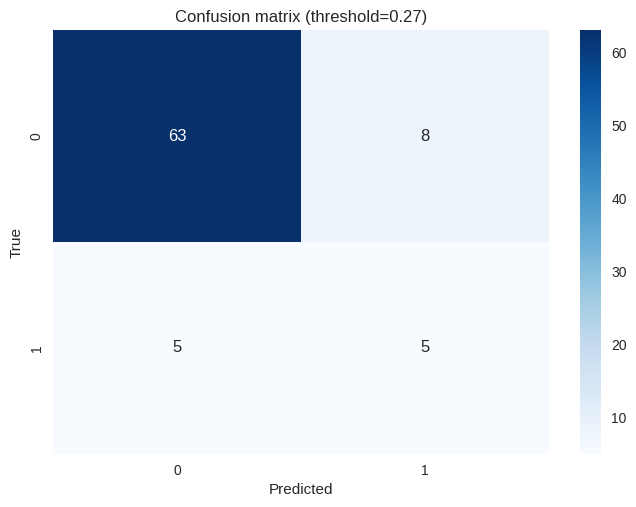

In [8]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.27)

In [ ]:
model = XGBClassifier(random_state=2)
X = df[numerical_cols + categorical_cols]
y = df[target_col]

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

preprocessor.fit(X)
X_imputed = preprocessor.transform(X)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imputed, y)
X_smote_df = pd.DataFrame(X_smote, columns=numerical_cols + categorical_cols)

param_grid = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [200, 400, 800],
    'classifier__max_depth': [3, 6, 9],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

#brier score and tuning test split = 0.1
y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(
    model, X_smote_df, y_smote, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.1
    )
untrained_model = model.set_params(**best_params)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(untrained_model, X, y)

In [ ]:
def train_and_evaluate_model_with_smote(
    model, X, y, numerical_cols, categorical_cols,
    n_folds=5, tune_params=False, param_grid=None,
    tuning_scoring='roc_auc', tuning_test_size=0.2
):
    y_pred_probs = np.array([])
    y_pred = np.array([])
    y_true = np.array([])

    if not tune_params:
        print("Training model with default hyperparameters...\n")

        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=2)

        for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            num_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])
            cat_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent'))])
            preprocessor = ColumnTransformer(transformers=[
                ('num', num_pipeline, numerical_cols),
                ('cat', cat_pipeline, categorical_cols)
            ])

            X_train_imputed = preprocessor.fit_transform(X_train)
            X_test_imputed = preprocessor.transform(X_test)

            smote = SMOTE(random_state=42)
            X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)
            
            X_train_smote = pd.DataFrame(X_train_smote, columns=numerical_cols + categorical_cols)

            model.fit(X_train_smote, y_train_smote)

            y_pred_prob_fold = model.predict_proba(X_test_imputed)[:, 1]
            y_pred_fold = model.predict(X_test_imputed)

            y_pred_probs = np.concatenate([y_pred_probs, y_pred_prob_fold])
            y_pred = np.concatenate([y_pred, y_pred_fold])
            y_true = np.concatenate([y_true, y_test])

            print(f"Fold {i}: ROC AUC = {roc_auc_score(y_test, y_pred_prob_fold):.4f}")

        fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
        total_roc_auc = roc_auc_score(y_true, y_pred_probs)
        best_params = model.get_params()
        print(f"\nOverall ROC AUC across folds: {total_roc_auc:.4f}")

        return y_true, y_pred, y_pred_probs, fpr, tpr, total_roc_auc, model, best_params

    else:
        print("Tuning hyperparameters with SMOTE on training set only...\n")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=tuning_test_size, stratify=y, random_state=42
        )

        num_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])
        cat_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent'))])
        preprocessor = ColumnTransformer(transformers=[
            ('num', num_pipeline, numerical_cols),
            ('cat', cat_pipeline, categorical_cols)
        ])

        X_train_imputed = preprocessor.fit_transform(X_train)
        X_test_imputed = preprocessor.transform(X_test)

        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

        X_train_smote = pd.DataFrame(X_train_smote, columns=numerical_cols + categorical_cols)
        best_params = tune_hyperparameters(
            model, param_grid, X_train_smote, y_train_smote,
            numerical_cols, categorical_cols, n_folds=3, scoring=tuning_scoring
        )
        model.set_params(**best_params)
        print(f"Best params after tuning:\n{best_params}")

        model.fit(X_train_smote, y_train_smote)

        y_pred_probs = model.predict_proba(X_test_imputed)[:, 1]
        y_pred = model.predict(X_test_imputed)
        y_true = y_test

        fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
        total_roc_auc = roc_auc_score(y_test, y_pred_probs)
        print(f"\nROC AUC on test set: {total_roc_auc:.4f}")

        return y_true, y_pred, y_pred_probs, fpr, tpr, total_roc_auc, model, best_params


Tuning hyperparameters with SMOTE on training set only...

Best hyperparameters: {'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 400, 'classifier__subsample': 0.9}
Best neg_brier_score score: -0.052428210673677735

Best params after tuning:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.9}

ROC AUC on test set: 0.6817


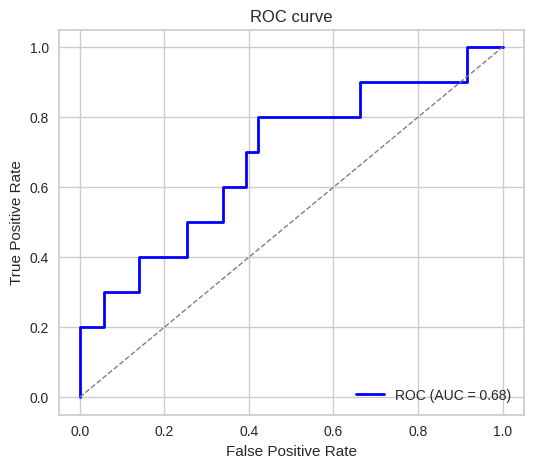

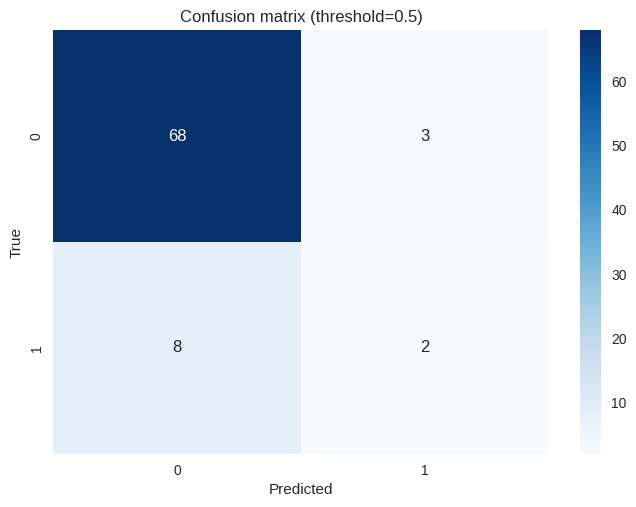

Preparation of a new explainer is initiated

  -> data              : 404 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x74d58ebfda80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.28e-05, mean = 0.123, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.748, mean = 0.00314, max = 1.0
  -> model_info        : package xgboost

A new explainer has been created!


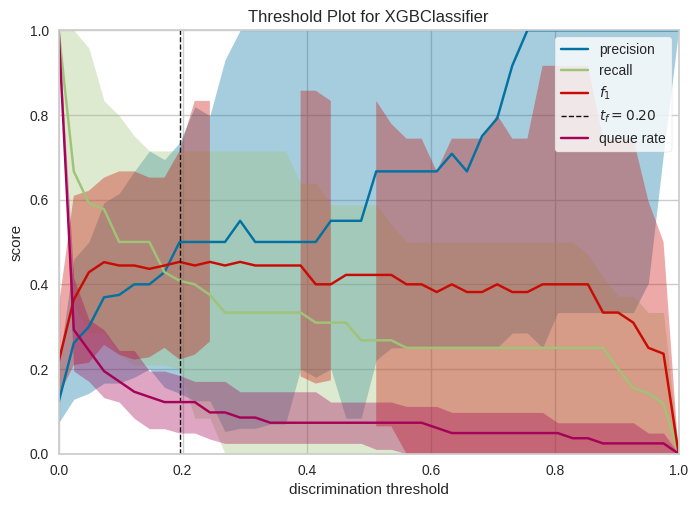

In [23]:
X = df[numerical_cols + categorical_cols]
y = df[target_col]

param_grid = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [200, 400, 800],
    'classifier__max_depth': [3, 6, 9],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

model = XGBClassifier(random_state=2)
#brier score and tuning test split = 0.2


y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model_with_smote(model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.2)
untrained_model = model.set_params(**best_params)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(untrained_model, X, y)

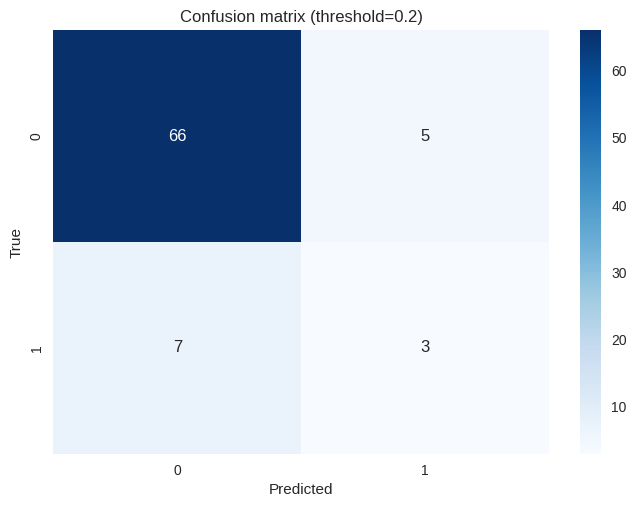

In [25]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.20)